In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [5]:
table = pd.read_html(url)
mars_table = table[0]
mars_table

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
mars_table.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
mars_table["terrestrial_date"] = mars_table["terrestrial_date"].apply(pd.to_datetime)

In [12]:
mars_table.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [13]:
mars_table.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [18]:
# Question: How many months exist on Mars?
mars_table["month"].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [ ]:
## Answer: There are 12 Martian months recorded in this data. 
## However, Mars has a 24 month cycle.

In [23]:
# Question: Coldest and warmest months on Mars (at the location of Curiosity?)
temps = mars_table.groupby(["month"])["min_temp"].mean()
temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

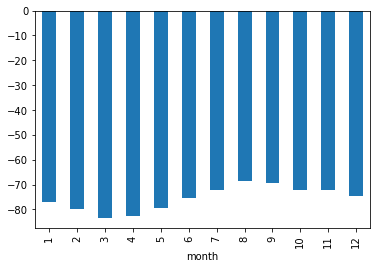

In [25]:
## Answer: August (8) has the coldest average while March (3) 
## has the warmest average
temps.plot.bar(x = 'month')

In [26]:
# Question: Which months have the lowest and 
# highest atmospheric pressure on Mars?
pressure = mars_table.groupby(["month"])["pressure"].mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

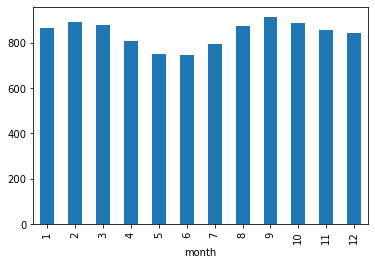

In [27]:
## Answer: June (6) has the lowest pressure and 
## September (9) has the highest pressure
pressure.plot.bar(x = 'month')

<AxesSubplot:xlabel='terrestrial_date'>

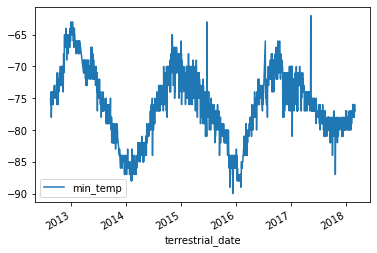

In [29]:
# Question: How many terrestrial days exist in a Martian year?
mars_table.plot(x= 'terrestrial_date', y= 'min_temp')

In [ ]:
## Answer: It appears about 700 days exist in a Martian year.
## Based on the graph, it takes about 700 days (or about 2 years) 
## for the minimum temperatures
## to make a full cycle which symbolizes a full eclipse 